**1.(i) 활성화 함수가 sigmoid인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 0&0&0&0&-1 \\ 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0\end{bmatrix},~
b_1 : [0,0,0,0,0],~
W_2 : \begin{bmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \end{bmatrix},~
b_2 : [0,0,0,0,0]
\}
$$
로 주어져 있다.
데이터 ${\bf x}=[\log 2,0,0,0,0]$의 라벨이 $[0,0,0,1,0]$이라 하자.
손실함수는 교차 엔트로피(cross entropy)에 $L^2$-규제 ($L^2$-regularization)가 가해져 있다.
가중치 감소의 세기가 $\lambda=1$
일 때, 데이터 $\bf x$의 손실함수 값을 구하시오.**

첫번째 Affine 변환을 합니다.
$$
\begin{pmatrix}
\log 2&0&0&0&0
\end{pmatrix}
\begin{pmatrix} 0&0&0&0&-1 \\ 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0\end{pmatrix}
=
\begin{pmatrix}
0&0&0&0&-\log 2
\end{pmatrix}
$$
시그모이드 함수를 적용합니다.
$$
({1 \over 1+e^0}, {1 \over 1+e^0}, {1 \over 1+e^0}, {1 \over 1+e^0}, {1 \over 1+e^{\log 2}})
= ( {1 \over 2}, {1 \over 2}, {1 \over 2}, {1 \over 2}, {1 \over 3})
$$
두번째 Affine 변환을 합니다.
$$
\begin{pmatrix}
{1 \over 2}&{1 \over 2}&{1 \over 2}&{1 \over 2}&{1 \over 3}
\end{pmatrix}
\begin{pmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \end{pmatrix}
=
\begin{pmatrix}
{1 \over 2}&{1 \over 2}&{1 \over 2}&{1 \over 3}&{1 \over 2}
\end{pmatrix}
$$
소프트맥스 변환을 합니다.  
라벨 위치의 확률만 계산하면 됩니다.
$$
(*,*,*,{e^{1/3} \over 4e^{1/2}+e^{1/3}},*)
$$
라벨 위치의 확률에 $-\log$를 씌워서 교차 엔트로피를 구합니다.
$$
-\log {e^{1/3} \over 4e^{1/2}+e^{1/3}} = -\log {1 \over 4e^{1/6}+1} = \log (4e^{1/6}+1)
$$
50개 가중치중에 9개가 1, 한개가 -1, 나머지가 모두 0이기 때문에 모든 가중치들의 제곱의 합은 10입니다.  
$L^2$-페널티를 구합니다.
$$
{1 \over 2} \times \lambda \times (\sum_{i,j=1}^5 w_{i,j}^2 + \sum_{i,j=1}^5 {w'}_{i,j}^2) = 5
$$
교차엔트로피와 $L^2$-페널티를 더한 값이 손실함수 값입니다.
$$
5+\log (4e^{1/6}+1)
$$

**(ii) 코드로 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

x = np.array([[np.log(2),0,0,0,0]])

W1 = np.array([[0,0,0,0,-1],[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0]])
b1 = np.zeros(5)
affine1 = Affine(W1,b1)
x = affine1.forward(x)

relu = Sigmoid()
x = relu.forward(x)

W2 = np.array([[0,0,0,0,1],[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0]])
b2 = np.zeros(5)
affine2 = Affine(W2,b2)
x = affine2.forward(x)

t = np.array([[0,0,0,1,0]])
last = SoftmaxWithLoss()
L_c = last.forward(x,t)

weight_decay_lambda = 1
L_p = 0.5*weight_decay_lambda*(np.sum(W1**2)+np.sum(W2**2))

L_c+L_p

6.744919690825107

In [2]:
5+np.log(4*np.exp(1/6)+1)

6.744919690825107

**2. (i) (1번 문제 계속) 교차 엔트로피(cross entropy)값을 $L_c$라 하고 $L^2$-규제 ($L^2$-regularization)까지 고려한 손실함수 값을 $L$이라 하자.
첫번째 Affine층에 흘러들어온 교차 엔트로피의 미분이
$$
{\partial L_c \over \partial {\bf y}} = \begin{bmatrix} 0&1&1&1&0 \end{bmatrix}
$$
으로 주어져 있다.
여기서, $\bf y$는 첫번째 Affine층의 출력값이다.
$L^2$-규제 ($L^2$-regularization)까지 고려한 손실함수 $L$의 첫번째 가중치 $W_1$에 대한 미분
$$
\partial L \over \partial W_1
$$
을 구하시오.**

손실함수 $L$은 교차 엔트로피 $L_c$와 $L^2$-페널티 $L_p$의 합입니다.
$$
L = L_c + L_p
$$
미분은 선형입니다.
$$
{\partial L \over \partial W_1} = {\partial L_c \over \partial W_1} + {\partial L_p \over \partial W_1}
$$
Affine층의 역전파 공식을 적용합니다.
$$
{\partial L_c \over \partial W_1} =
\begin{pmatrix}
\log 2\\0\\0\\0\\0
\end{pmatrix}
\begin{pmatrix}
0&1&1&1&0
\end{pmatrix}
=
\begin{pmatrix}
0&\log 2&\log 2&\log 2&0\\
0&0&0&0&0\\
0&0&0&0&0\\
0&0&0&0&0\\
0&0&0&0&0
\end{pmatrix}
$$
$L^2$-penalty를 $W_1$으로 미분합니다.
$$
{\partial L_p \over \partial W_1} =
\lambda W_1 =
\begin{pmatrix} 0&0&0&0&-1 \\ 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0\end{pmatrix}
$$
두 그레디언트를 더합니다.
$$
{\partial L \over \partial W_1} = {\partial L_c \over \partial W_1} + {\partial L_p \over \partial W_1} =
\begin{pmatrix} 0&\log 2&\log 2&\log 2&-1 \\ 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0\end{pmatrix}
$$

**(ii) 코드로 검산하시오.**

In [3]:
dout = np.array([[0,1,1,1,0]])

affine1.backward(dout)

affine1.dW + weight_decay_lambda * W1

array([[ 0.        ,  0.69314718,  0.69314718,  0.69314718, -1.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

**3.(i) 활성화 함수가 Relu인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \end{bmatrix},~
b_1 : [0,0,0,0,0],~
W_2 : \begin{bmatrix} 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \end{bmatrix},~
b_2 : [0,0,0,0,0]
\}
$$
로 주어져 있다.
데이터 ${\bf x}=[1,2,3,4,5]$의 라벨이 $[1,0,0,0,0]$이라 하자.
손실함수는 교차 엔트로피(cross entropy)에 $L^2$-규제 ($L^2$-regularization)가 가해져 있다.
가중치 감소의 세기가 $\lambda={1 \over 5}$
일 때, 데이터 $\bf x$의 손실함수 값을 구하시오.**

첫번째 Affine 변환을 합니다.
$$
\begin{pmatrix}
1&2&3&4&5
\end{pmatrix}
\begin{pmatrix} 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \end{pmatrix}
=
\begin{pmatrix}
3&-3&3&-3&3
\end{pmatrix}
$$
Relu 함수를 적용합니다.
$$
(3,0,3,0,3)
$$
두번째 Affine 변환을 합니다.
$$
\begin{pmatrix}
3&0&3&0&3
\end{pmatrix}
\begin{pmatrix} 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \\ -1&1&-1&1&-1 \\ 1&-1&1&-1&1 \end{pmatrix}
=
\begin{pmatrix}
9&-9&9&-9&9
\end{pmatrix}
$$
소프트맥스 변환을 합니다.  
라벨 위치의 확률만 계산하면 됩니다.
$$
({e^9 \over 3e^9+2e^{-9}},*,*,*,*)
$$
라벨 위치의 확률에 $-\log$를 씌워서 교차 엔트로피를 구합니다.
$$
-\log {e^9 \over 3e^9+2e^{-9}} = -\log {1 \over 3+2e^{-18}} = \log (3+2e^{-18})
$$
50개 가중치는 모두 1 또는 -1이기 때문에 모든 가중치들의 제곱의 합은 50입니다.  
$L^2$-페널티를 구합니다.
$$
{1 \over 2} \times \lambda \times (\sum_{i,j=1}^5 w_{i,j}^2 + \sum_{i,j=1}^5 {w'}_{i,j}^2) = 5
$$
교차엔트로피와 $L^2$-페널티를 더한 값이 손실함수 값입니다.
$$
5+\log (3+2e^{-18})
$$

**(ii) 코드로 검산하시오.**

In [4]:
from common.layers import Relu

x = np.array([[1,2,1,2,1]])

W1 = np.array([[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1]])
b1 = np.zeros(5)
affine1 = Affine(W1,b1)
x = affine1.forward(x)

relu = Relu()
x = relu.forward(x)

W2 = np.array([[1,0,0,0,1],[0,1,0,1,0],[0,0,1,0,0],[0,1,0,1,0],[1,0,0,0,1]])
b2 = np.zeros(5)
affine2 = Affine(W2,b2)
x = affine2.forward(x)

t = np.array([[1,0,0,0,0]])
last = SoftmaxWithLoss()
L_c = last.forward(x,t)

weight_decay_lambda = 1/17
L_p = 0.5*weight_decay_lambda*(np.sum(W1**2)+np.sum(W2**2))

L_c+L_p

3.877968048850379

In [5]:
1+np.log(3+2*np.exp(2))

3.8779680488503785

**4. 교차 엔트로피(cross entropy)값을 $L_c$라 하고 $L^2$-규제 ($L^2$-regularization)까지 고려한 손실함수 값을 $L$이라 하자. $k$번째 Affine층의 가중치 행렬 $W_k$, 편향벡터  $b_k$ 그리고 가중치 감소 계수  $\lambda$에 대하여 등식
$$
{\partial L \over \partial W_k} = {\partial L_c \over \partial W_k} + \lambda W_k, \qquad
{\partial L \over \partial b_k} = {\partial L_c \over \partial b_k}
$$
을 설명하시오. (편의를 위해 $W_k$를 2$\times$2 행렬, $b_k$를 2차원 벡터라 가정해도 좋다.)**

손실함수 $L$은 교차 엔트로피 $L_c$와 $L^2$-페널티 $L_p$의 합입니다.
$$
L = L_c + L_p
$$
미분은 선형입니다.
$$
{\partial L \over \partial W_k} = {\partial L_c \over \partial W_k} + {\partial L_p \over \partial W_k}
$$
$W_k  = \begin{pmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{pmatrix}$라 하죠.  
$L^2$-페널티는 $L_p = {1 \over 2} \times \lambda \times (w_{11}^2+w_{12}^2+w_{21}^2+w_{22}^2 + $나머지 가중치들의 제곱의 합$)$입니다.  
$w_{ij}$로 미분하면 $w_{ij}^2$을 제외한 나머지 변수들은 모두 죽습니다.  
$$
{\partial L_p \over \partial W_k} =
\begin{pmatrix}
{\partial L_p \over \partial w_{11}} & {\partial L_p \over \partial w_{12}} \\
{\partial L_p \over \partial w_{21}} & {\partial L_p \over \partial w_{22}}
\end{pmatrix}
=
\begin{pmatrix}
\lambda w_{11} & \lambda w_{12} \\
\lambda w_{21} & \lambda w_{22}
\end{pmatrix}
= \lambda W_k
$$
$$
{\partial L \over \partial W_k} = {\partial L_c \over \partial W_k} + {\partial L_p \over \partial W_k}
= {\partial L_c \over \partial W_k} +  \lambda W_k
$$
$L^2$-페널티는 편향을 변수로 포함하지 않기 때문에 $b_k$로 미분하면 0입니다.
$$
{\partial L \over \partial b_k} = {\partial L_c \over \partial b_k} + {\partial L_p \over \partial b_k} = {\partial L_c \over \partial b_k}
$$

**5. (i)  다음은 Drop Out 층의 순전파와 역전파를 구현하는 코드이다.
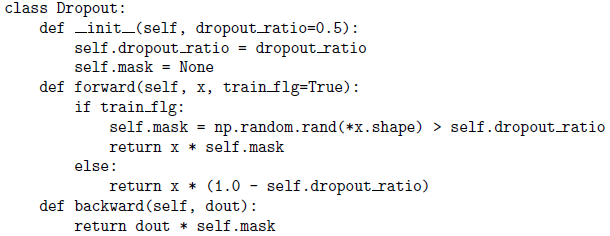
입력 데이터와 생성된 random 행렬이 각각
$$
\begin{pmatrix} 1&2&3 \\ 4&5&6 \\ 7&8&9 \end{pmatrix}, \qquad
\begin{pmatrix} 0.4&0.1&0.5 \\ 0.5&0.5&0.6 \\ 0.2&0.1&0.9 \end{pmatrix}
$$
이고 dropout ratio는 0.3이라 하자. 훈련할 때와 테스트할 때 출력값이 각각 어떻게 되겠는가?**

**훈련할때 출력값:**
$$
\begin{pmatrix} 0.4&0.1&0.5 \\ 0.5&0.5&0.6 \\ 0.2&0.1&0.9 \end{pmatrix} > 0.3
$$
에서 0.3을 넘는 값은 True, 넘지 않는 값은 False로 바뀐다.
$$
\begin{pmatrix} T&F&T \\ T&T&T \\ F&F&T \end{pmatrix}
$$
Hadamard prodcut를 할때 True는 1로 False는 0으로 바꿔서 계산한다.
$$
\begin{pmatrix} 1&2&3 \\ 4&5&6 \\ 7&8&9 \end{pmatrix}
\odot
\begin{pmatrix} T&F&T \\ T&T&T \\ F&F&T \end{pmatrix}
=
\begin{pmatrix} 1&2&3 \\ 4&5&6 \\ 7&8&9 \end{pmatrix}
\odot
\begin{pmatrix} 1&0&1 \\ 1&1&1 \\ 0&0&1 \end{pmatrix}
=
\begin{pmatrix} 1&0&3 \\ 4&5&6 \\ 0&0&9 \end{pmatrix}
$$

**테스트할때 출력값:**  
입력 신호 일부를 완전히 죽이지 않고 전체 신호를 70프로 다운 시킨다.
$$
0.7 \times \begin{pmatrix} 1&2&3 \\ 4&5&6 \\ 7&8&9 \end{pmatrix}
=
\begin{pmatrix} 0.7&1.4&2.1 \\ 2.8&3.5&4.2 \\ 4.9&5.6&6.3 \end{pmatrix}
$$

**(ii) 코드로 검산하시오.**

In [6]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

mask = (np.array([[0.4,0.1,0.5],[0.5,0.5,0.6],[0.2,0.1,0.9]]) > 0.3)
print(mask, "\n==============\n", x*mask, "\n==============\n",x*(1-0.3))

[[ True False  True]
 [ True  True  True]
 [False False  True]] 
 [[1 0 3]
 [4 5 6]
 [0 0 9]] 
 [[0.7 1.4 2.1]
 [2.8 3.5 4.2]
 [4.9 5.6 6.3]]


**6. (i) Drop Out 층으로 흘러들어온 미분과 생성된 random 행렬이 각각
$$
\begin{pmatrix} 1&1&1 \\ 2&2&2 \\ 3&3&3 \end{pmatrix}, \qquad
\begin{pmatrix} 0.2&0.1&0.5 \\ 0.5&0.3&0.9 \\ 0.2&0.5&0.9 \end{pmatrix}
$$
이고 dropout ratio는 0.4라 하자. Drop Out층이 아래로 흘려 보내는 미분을 구하시오.**

$$
\begin{pmatrix} 0.2&0.1&0.5 \\ 0.5&0.3&0.9 \\ 0.2&0.5&0.9 \end{pmatrix} > 0.4
$$
에서 0.3을 넘는 값은 True, 넘지 않는 값은 False로 바뀐다.
$$
\begin{pmatrix} F&F&T \\ T&F&T \\ F&T&T \end{pmatrix}
$$
Hadamard prodcut를 할때 True는 1로 False는 0으로 바꿔서 계산한다.
$$
\begin{pmatrix} 1&1&1 \\ 2&2&2 \\ 3&3&3 \end{pmatrix}
\odot
\begin{pmatrix} F&F&T \\ T&F&T \\ F&T&T \end{pmatrix}
=
\begin{pmatrix} 1&1&1 \\ 2&2&2 \\ 3&3&3 \end{pmatrix}
\odot
\begin{pmatrix} 0&0&1 \\ 1&0&1 \\ 0&1&1 \end{pmatrix}
=
\begin{pmatrix} 0&0&1 \\ 2&0&2 \\ 0&3&3 \end{pmatrix}
$$

**(ii) 코드로 검산하시오.**

In [7]:
dout = np.array([[1,1,1],[2,2,2],[3,3,3]])

mask = (np.array([[0.2,0.1,0.5],[0.5,0.3,0.9],[0.2,0.5,0.9]]) > 0.4)
print(mask, "\n==============\n", dout*mask)

[[False False  True]
 [ True False  True]
 [False  True  True]] 
 [[0 0 1]
 [2 0 2]
 [0 3 3]]


**7. 다음 코드를 실행했을 때 출력될 값들을 대략적으로 쓰시오.**
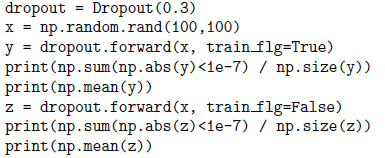

비율 0.3으로 dropout층을 만듭니다.  
균등분포를 따라 0과 1사이의 숫자 10,000개를 선택해서 100$\times$100행렬 ${\bf x}$를 만듭니다.  
${\bf x}$가 dropout층에 입력될 데이터 배치 묶음입니다.  
먼저 dropout층을 훈련용으로 설정하고 순전파를 진행합니다.  
dropout층은 입력신호를 랜덤하게 30프로 죽입니다.  
`np.abs(y)<1e-7`은 수식으로 쓰면 $|y|<10^{-7}$입니다.  
`np.sum(np.abs(y)<1e-7)`은 dropout층이 죽인 신호의 개수이고 `np.size(y)`는 전체 신호의 개수입니다.  
따라서, dropout층이 죽인 신호의 비율인 $0.3$이 출력됩니다.  
입력신호는 0과 1사이에서 랜덤하게 선택되었으므로 평균은 $0.5$입니다.  
랜덤하게 30프로가 죽었기 때문에 출력신호의 평균은 $0.5 \times 0.7=0.35$입니다.  
다음은 dropout층을 테스트용으로 설정하고 순전파를 진행합니다.  
테스트할때 dropout층은 입력신호의 전체세기를 줄일뿐 특정 신호를 죽이지는 않습니다.  
따라서, dropout층이 죽인 신호의 비율인 $0$이 출력됩니다.  
입력신호의 평균이 $0.5$인데 전체 세기를 줄였기 때문에 출력신호의 평균은 $0.5 \times 0.7=0.35$입니다.

In [8]:
from common.layers import Dropout

dropout = Dropout(0.3)
x = np.random.rand(100,100)

y = dropout.forward(x, train_flg=True)
print(np.sum(np.abs(y)<1e-7) / np.size(y))
print(np.mean(y))

z = dropout.forward(x, train_flg=False)
print(np.sum(np.abs(z)<1e-7) / np.size(z))
print(np.mean(z))

0.2986
0.3530639290052819
0.0
0.3515642287062075
